#### Importing Dependencies

In [1]:
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Loading the corpus and the results

#### Downloading the brown corpus and universal tagset

In [2]:
nltk.download('universal_tagset')
nltk.download('brown')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

#### Checking if we are in the HMM directory

In [3]:
if os.getcwd().endswith('HMM') == False:
    os.chdir('HMM')

##### If the results are not present, run the cross_validation.py file

In [4]:
#if either of HMM_symbolic_results.pkl or HMM_vector_results.pkl are not present, run the cross-validation script
try:
    with open('HMM_symbolic_results.pkl', 'rb') as f:
        HMM_symbolic_results = pickle.load(f)
    with open('HMM_vector_results.pkl', 'rb') as f:
        HMM_vector_results = pickle.load(f)
except:
    print("Running cross-validation script (this may take a while ~7 min) ...")
    #if you are using a Mac, comment out the below line and use the one after it
    os.system('python cross_validation.py')
    #os.system('python3 cross_validation.py')
    with open('HMM_symbolic_results.pkl', 'rb') as f:
        HMM_symbolic_results = pickle.load(f)
    # with open('HMM_vector_results.pkl', 'rb') as f:
    #     HMM_vector_results = pickle.load(f)

## Visualizing the results

In [5]:
TAGSET = HMM_symbolic_results['tag_set']

In [6]:
print("HMM_symbolic model 5-fold cross-validation accuracy:", HMM_symbolic_results['accuracy'])

HMM_symbolic model 5-fold cross-validation accuracy: 0.9520934433271959


#### HMM Viterbi Symbolic Confusion Matrix

<Axes: >

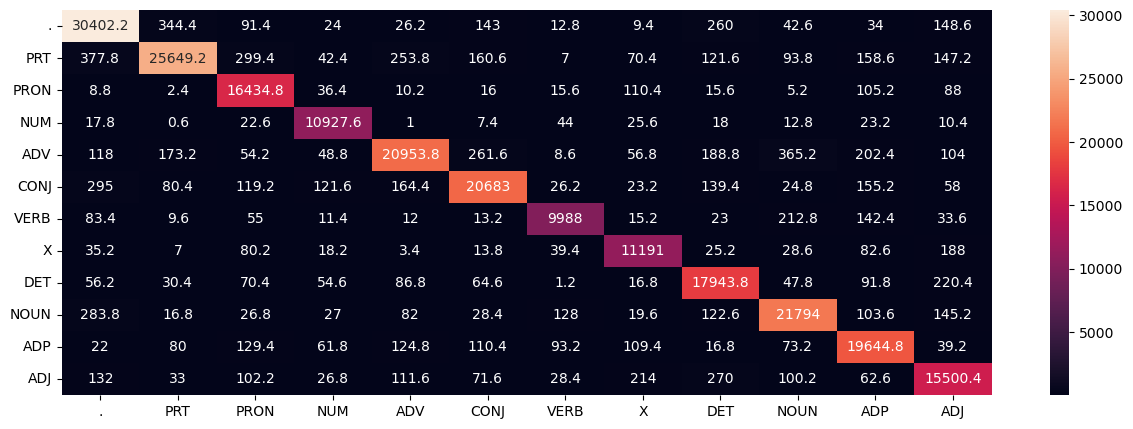

In [7]:
#using sns.heatmap to plot the confusion matrix
plt.figure(figsize=(15,5))
sns.heatmap(HMM_symbolic_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )

In [8]:
#calculating the per pos accuracy from the confusion matrix
def get_pos_accuracies(confusion_matrix, tag_set):
    per_pos_accuracy = np.diag(confusion_matrix)/np.sum(confusion_matrix, axis=1)
    per_pos_accuracy = np.round(per_pos_accuracy, 3)
#store the per pos accuracy in a dictionary
    per_pos_accuracy_dict = {}
    for i, tag in enumerate(tag_set):
        per_pos_accuracy_dict[tag] = per_pos_accuracy[i]
    print("Per POS accuracy: ")
    for key in per_pos_accuracy_dict:
        print(key,': ', per_pos_accuracy_dict[key])

In [9]:
get_pos_accuracies(HMM_symbolic_results['confusion_matrix'], TAGSET)

Per POS accuracy: 
. :  0.964
PRT :  0.937
PRON :  0.975
NUM :  0.983
ADV :  0.93
CONJ :  0.945
VERB :  0.942
X :  0.955
DET :  0.96
NOUN :  0.957
ADP :  0.958
ADJ :  0.931


#### HMM Viterbi Vector Confusion Matrix

In [14]:
print("HMM_vector model 5-fold cross-validation accuracy:", HMM_vector_results['accuracy'])

HMM_vector model 5-fold cross-validation accuracy: 0.9520957895531815


<Axes: >

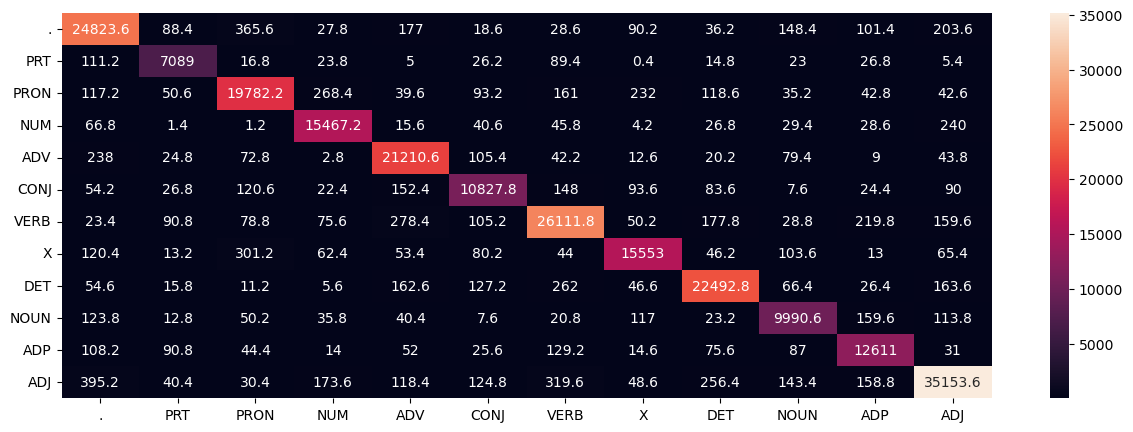

In [11]:
# using sns.heatmap to plot the confusion matrix
plt.figure(figsize=(15,5))
sns.heatmap(HMM_vector_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )

In [13]:
# calculating the per pos accuracy from the confusion matrix
get_pos_accuracies(HMM_vector_results['confusion_matrix'], TAGSET)

Per POS accuracy: 
. :  0.951
PRT :  0.954
PRON :  0.943
NUM :  0.969
ADV :  0.97
CONJ :  0.929
VERB :  0.953
X :  0.945
DET :  0.96
NOUN :  0.934
ADP :  0.949
ADJ :  0.951
